<a href="https://www.kaggle.com/code/enesarslan8/survival-prediction-on-the-titanic?scriptVersionId=103190611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style='font-family:Tahoma; text-align:center;'>SURVIVAL PREDICTION ON THE TITANIC 🚢🎻</h1>

![](https://ichef.bbci.co.uk/news/800/cpsprodpb/A29E/production/_93203614_gettyimages-3320778.jpg.webp)

## TOC
1. <a href='#intro'>Introduction</a>
    - <a href='#goal'>Goal</a>
    - <a href='#dataset'>Story of the Dataset</a>
    - <a href='#import'>Importing Dataset and Libraries</a>
2. <a href='#eda'>Exploratory Data Analysis</a>
    - <a href='#info'>Basic Information</a>
    - <a href='#visualize'>Visualizing Variables</a>
    - <a href='#correlation'>Correlation</a>
    - <a href='#missing_values'>Missing Values</a>
3. <a href='#engineering'>Feature Engineering</a>
    - <a href='#handle_missing'>Handling Missing Values</a>
    - <a href='#outliers'>Outliers</a>
    - <a href='#extraction'>Feature Extraction</a>
    - <a href='#encoding'>Encoding</a>
    - <a href='#scaling'>Scaling</a>
4. <a href='#model'>Modelling</a>
    - <a href='#fitpredict'>Fit and Predict</a>
    - <a href='#validation'>Validation Methods</a>
    - <a href='#formula'>Formula</a>
    - <a href='#conclusion'>Conclusion</a>
    - <a href='#submission'>Submission</a>


<a id= 'goal'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Goal</h2>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.
        </p>
    </div>

<a id= 'dataset'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Story of the Dataset</h2>

<span style='font-size:17px'>The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew. Let's take a journey on the Titanic's legacy. A fascination with disasters... </span>

* Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<a id= 'import'></a>
<h3 style='font-family:Tahoma;text-align:center;'>Importing Dataset and Libraries</h3>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
combine = [df_train, df_test] # Combine will be used when making changes on both datasets
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
for data in combine:
    data.columns = data.columns.str.lower()
    
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

***

<a id='eda'></a>
<h1 style='font-family:Tahoma; text-align:center;'>EXPLORATORY DATA ANALYSIS</h1>

<a id = 'info'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Basic Information</h2>

In [4]:
# checking non-null counts and datatype information of the variables

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# shape values of both train and test sets

df_train.shape, df_test.shape

((891, 12), (418, 11))

In [6]:
# passengerid, survived and pclass doesn't contain numerical information
# they are useful as categoricals

for data in combine:
    for col in ['passengerid','pclass']:
        data[col] = data[col].astype('O')
        
df_train.survived = df_train.survived.astype('O')

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20, show_cols=False):
    """
    Returns the categorical, numerical and categorical but cardinal variables.
    Note: Categorical variables includes numerical values that have low unique values than 10.

    Parameters
    ------
        dataframe: dataframe
                Dataframe that wanted to get column types
        cat_th: int, optional
                Threshold value for the numerical but categorical values
        car_th: int, optinal
                Threshold value for the categorical but cardinal values

    Returns
    ------
        cat_cols: list
                Categorical variables
        num_cols: list
                Numeric variables
        cat_but_car: list
                Categorical but cardinal values

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    if show_cols:
        print(f"""Categorical Variables={cat_cols},\nNumerical Variables={num_cols},\nCategorical but Cardinal Variables={cat_but_car}""")
    
    return cat_cols, num_cols, cat_but_car

In [8]:
# We need to seperate our columns based on the information type they contains
# cat_but_car means categorical values with high cardinality such as passengerid, name

cat_cols, num_cols, cat_but_car = grab_col_names(df_train, show_cols= True)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 2
cat_but_car: 4
num_but_cat: 2
Categorical Variables=['survived', 'pclass', 'sex', 'embarked', 'sibsp', 'parch'],
Numerical Variables=['age', 'fare'],
Categorical but Cardinal Variables=['passengerid', 'name', 'ticket', 'cabin']


<a id='visualize'></a> 
<h2 style='font-family:Tahoma;text-align:center;'>Visualizing Variables</h2>

In [9]:
def visualize_numerical(dataframe, numerical_columns,show_pivot=False):
    
    pivot = pd.pivot_table(dataframe, index = 'survived', values = numerical_columns)
        
    fig, axes = plt.subplots(1, len(numerical_columns), sharex=True, figsize=(12,6))
    fig.suptitle('Titanic')
    
    for ind,col in enumerate(numerical_columns):

        sns.barplot(ax=axes[ind], x=pivot.index, y=pivot[col].values, palette='cubehelix')
        axes[ind].set_title(f"{col.upper()}")
        axes[ind].set_ylabel(col)
        
    if show_pivot:
        print(pivot)
    
    plt.show()

                age       fare
survived                      
0         30.626179  22.117887
1         28.343690  48.395408


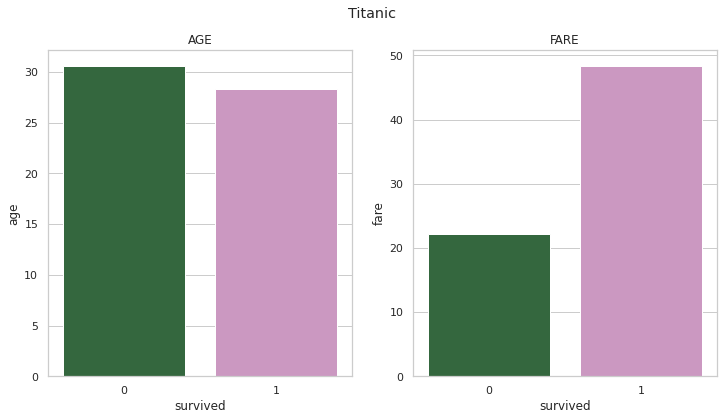

In [10]:
# mean of the numerical variables by survived

visualize_numerical(df_train,num_cols,show_pivot=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; People who survived in the titanic was younger and wealthier on the average than the people who didn't.
</div>

In [11]:
# finding low classed categoricals to see on age distribution
# variables with high class values such as parch makes so hard to read the plot

low_class_cats = [col for col in cat_cols if df_train[col].nunique() <= 3]
low_class_cats

['survived', 'pclass', 'sex', 'embarked']

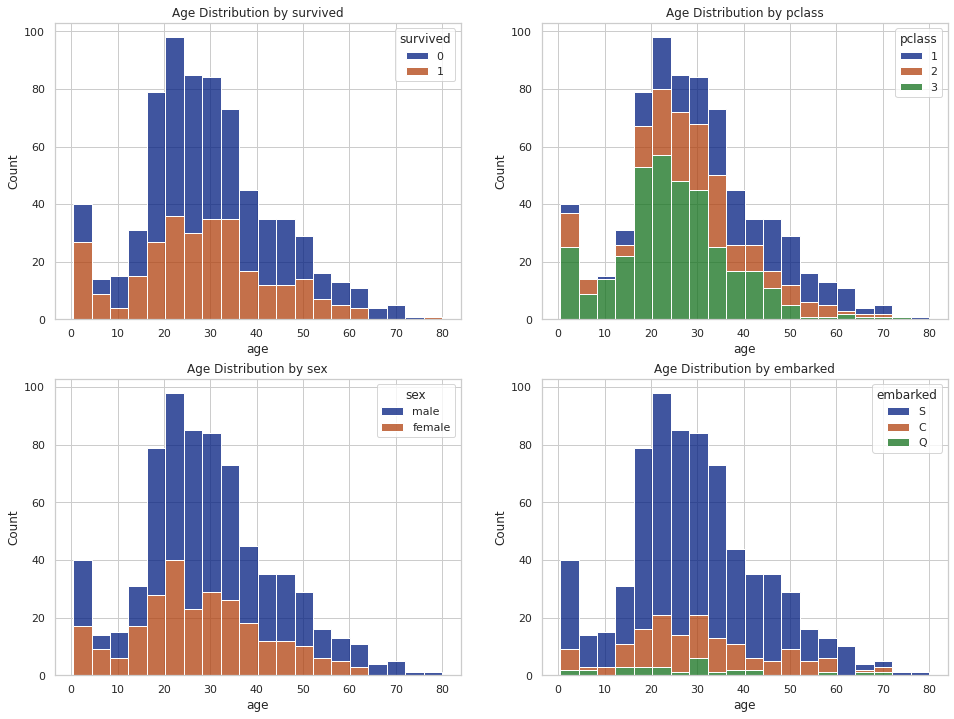

In [12]:
plt.rcParams['figure.figsize'] = 12,4
fig, axes = plt.subplots(2,2,figsize=(16,12))
for ind,col in enumerate(low_class_cats):
    plt.subplot(2,2,ind+1)
    ax = sns.histplot(x = df_train.age, hue=df_train[col],palette='dark',multiple='stack',element='bars')
    ax.set_title(f'Age Distribution by {col}')

plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; Childs were a priority on the rescue operation and more than half of the childs (0-10) were survived.
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; While older people tend to be in first class, high portion of the young adults and childs are on the second and third classes.
</div>

<AxesSubplot:xlabel='pclass', ylabel='age'>

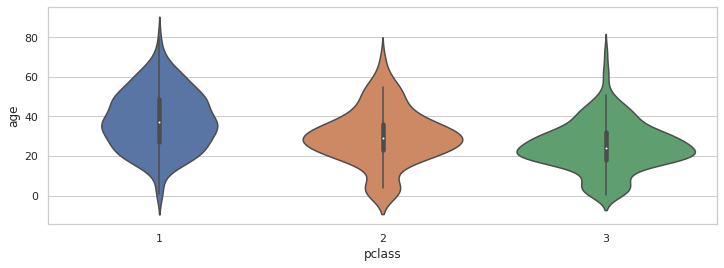

In [13]:
# making it clear to see that age distribution was different by classes

sns.violinplot(x=df_train['pclass'], y=df_train['age'])

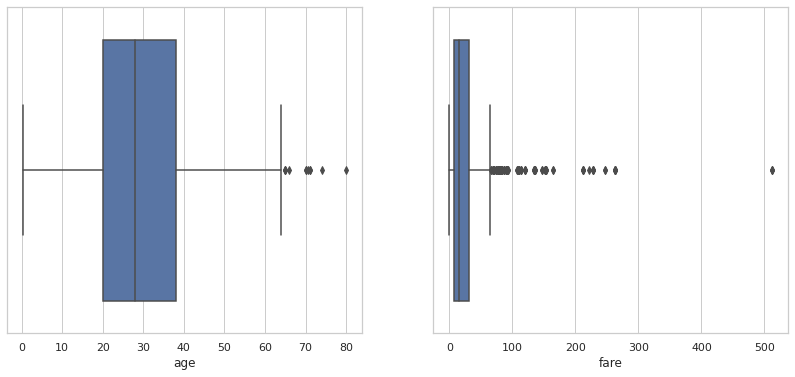

In [14]:
# Boxplot of every numerical variables to see the summary of the outlier values

plt.rcParams["figure.figsize"] = (14,6)

for index, num_col in enumerate(num_cols):
    plt.subplot(1,2,index+1)
    sns.boxplot(x=num_col,data=df_train)
    
plt.show()

<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    🔧 &nbsp; Fare column is hard to work on while having that extreme values. Need to be fixed.
</div>

In [15]:
def visualize_categorical(dataframe, categorical_columns,show_pivot=False):
    
    l = len(categorical_columns)
    
    fig, axes = plt.subplots(1, len(categorical_columns),figsize=(5*l,1*l))
    fig.suptitle('Survival Rates of the Titanic Passengers by Categorical Variables')
    
    for ind,col in enumerate(categorical_columns):
        
        grouped_pclass = dataframe.groupby(col).agg({'survived':['mean','count']})
        
        ax = sns.barplot(ax = axes[ind], x=grouped_pclass.index, y= grouped_pclass[('survived','mean')],hue=grouped_pclass[('survived','count')],palette='cubehelix',dodge=False)
        ax.legend(loc='upper right', title='Counts')
        ax.set_ylabel('Survival Rate')        
        if show_pivot:
            print(grouped_pclass)
    
    plt.show()

In [16]:
cat_cols.remove('survived')

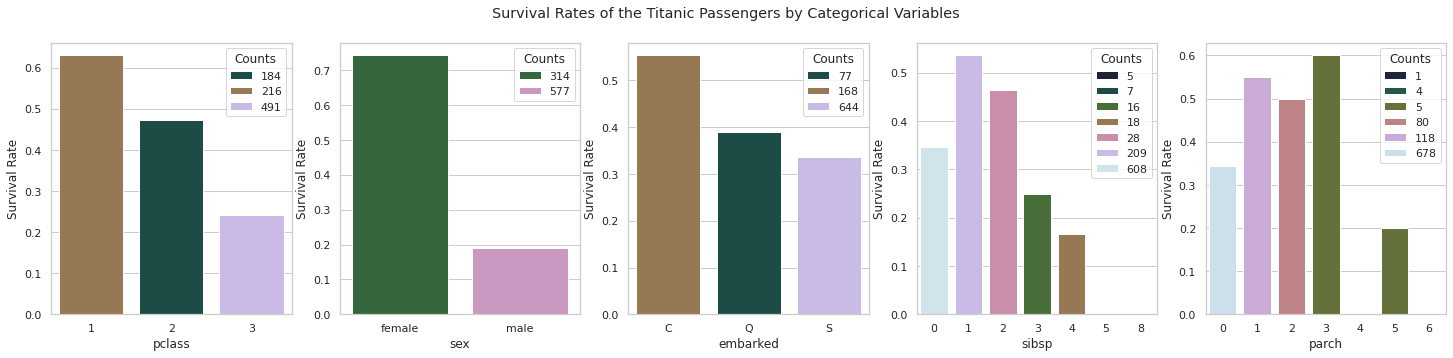

In [17]:
visualize_categorical(df_train, cat_cols)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; And now it is easy to say that women were another priority in rescuing.
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; Being a first class passenger was quite important.
</div>

<a id='correlation'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Correlation</h2>

In [18]:
df_train.survived = df_train.survived.astype(int)
df_train.corrwith(df_train.survived)[1:].sort_values(ascending=False)

fare     0.257307
parch    0.081629
sibsp   -0.035322
age     -0.077221
dtype: float64

In [19]:
# correlation map

corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,survived,age,sibsp,parch,fare
survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,0.096067,0.159651,0.216225,1.000000


<a id = 'missing_values'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Missing Values</h2>

In [20]:
def missing_values_table(dataframe, printer=False, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    if printer:
        print(missing_df, end="\n")

In [21]:
for data in combine:
    missing_values_table(data, printer=True)

          n_miss  ratio
cabin        687  77.10
age          177  19.87
embarked       2   0.22
       n_miss  ratio
cabin     327  78.23
age        86  20.57
fare        1   0.24


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; More than 75% of cabin values are NaN. My approach will be dropping the entire column because i dont see a way of filling empty values reasonably.
</div>

In [22]:
na_columns_train = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
na_columns_test = [col for col in df_test.columns if df_test[col].isnull().sum() > 0]
na_columns = list(set(na_columns_test + na_columns_train))

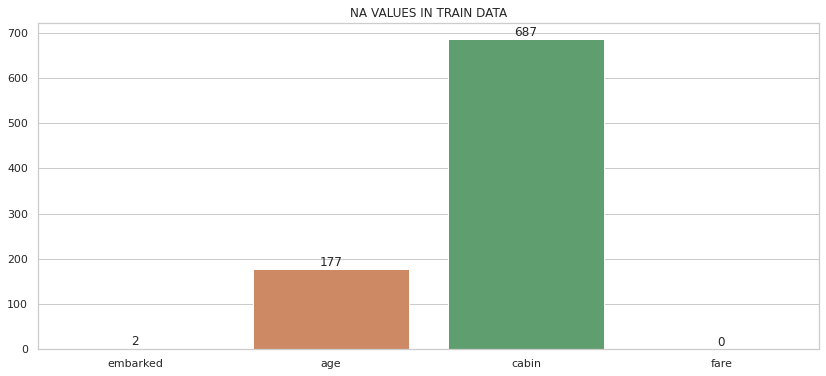

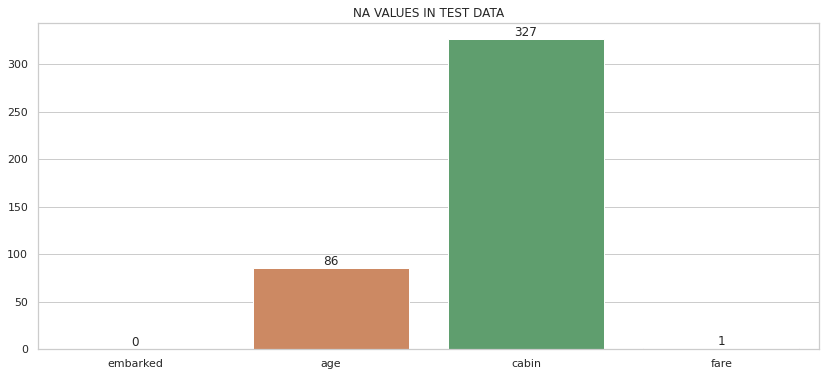

In [23]:
for data,label in zip(combine,['train','test']):
    ax = sns.barplot(x=na_columns, y= data[na_columns].isnull().sum().values)
    ax.set_title('NA VALUES IN '+ label.upper() + ' DATA')
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()

***

<a id='engineering'></a>
<h1 style='text-align:center; font-family:Tahoma'>FEATURE ENGINEERING</h1>

<a id = 'handle_missing'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Handling Missing Values</h2>

<b style='font-size:15px'>CABIN</b>

In [24]:
# cabin column will be dropped but even na values can keep information

df_train.groupby(df_train.cabin.isna()).agg({'survived':['mean','count']})

survived      
           mean count
cabin                
False  0.666667   204
True   0.299854   687

In [25]:
for data in combine:
    data['CABIN_IS_NA'] = data.cabin.transform(pd.isna)

In [26]:
# It seems like values we created (True,False) effecting outcome value differently
# Let's measure that is it statistically meaningful or not ?

from statsmodels.stats.proportion import proportions_ztest

def perform_ztest(dataframe,subject,dependent):

    _, pvalue = proportions_ztest(count=[
        dataframe.loc[dataframe[subject] == True, dependent].sum(),
        dataframe.loc[dataframe[subject] == False, dependent].sum()
    ],
                                 nobs= [
        dataframe.loc[dataframe[subject] == True, dependent].shape[0],
        dataframe.loc[dataframe[subject] == False, dependent].shape[0]
    ])


    # Lower pvalue than 0.005 means there is statistically difference with these two values
    return pvalue < 0.005

In [27]:
perform_ztest(df_train,'CABIN_IS_NA','survived')

True

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; It is important to perform z-test to newly created variables. Is effects on the target are statistically meaningful or just a coincidence? Lower pvalue than 0.005 means it is a difference in a real way. 
</div>

<b style='font-size:15px'>OTHERS</b>

In [28]:
# filling embarked and fare columns with mode and median.
# there are only 3 na values total, so there is no problem with using simple methods.

df_train.embarked = df_train.embarked.fillna(df_train.embarked.mode()[0])
df_test.fare = df_test.fare.fillna(df_test.fare.median())

In [29]:
# Merging age and pclass columns of the train and test set for filling na values on both

age_pclass_total = pd.DataFrame({'age':pd.concat([df_train.age,df_test.age],ignore_index=True),
                                'pclass':pd.concat([df_train.pclass,df_test.pclass],ignore_index=True)})

age_pclass_total.groupby('pclass').agg({'age':'mean'})

,age
pclass,
1,39.159930
2,29.506705
3,24.816367


In [30]:
for data in combine:
    data.age = data.age.fillna(age_pclass_total.groupby('pclass')['age'].transform('mean'))

<a id= 'outliers'></a>
<h2 style='font-family:Tahoma;text-align:center;'> Outliers</h2>

In [31]:
# getting a more detailed describe table to determine outlier thresholds

df_train.describe([0.01,0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
survived,891.0,0.383838,0.486592,0.00,0.0,0.000,0.0000,0.0000,1.0,1.0000,1.00000,1.00000,1.0000
age,891.0,29.269997,13.248726,0.42,1.0,6.000,22.0000,26.0000,37.0,47.0000,54.00000,65.00000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0,0.000,0.0000,0.0000,1.0,1.0000,3.00000,5.00000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0,0.000,0.0000,0.0000,0.0,2.0000,2.00000,4.00000,6.0000
fare,891.0,32.204208,49.693429,0.00,0.0,7.225,7.9104,14.4542,31.0,77.9583,112.07915,249.00622,512.3292


<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    🔧 &nbsp; Look at 99th percentile and max value on fare column. There is a huge difference when compared to mean and std. 
</div>

In [32]:
# function that returning up and low limits for outlier detection

def outlier_thresholds(dataframe,colname,q1=0.05, q3=0.95):
    
    quartile1 = dataframe[colname].quantile(q1)
    quartile3 = dataframe[colname].quantile(q3)
    
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [33]:
def check_outlier(low_limit, up_limit, dataframe, colname):
    if dataframe[(dataframe[colname] > up_limit) | (dataframe[colname] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [34]:
def replace_with_thresholds(low_limit, up_limit,dataframe,colname):
    
    dataframe.loc[dataframe[colname] > up_limit,colname] = up_limit
    dataframe.loc[dataframe[colname] < low_limit,colname] = low_limit

In [35]:
def grab_outliers(dataframe, col_name,low,up, index=False):
    
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
    else:
        return dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]


In [36]:
# Columns that have outliers

outlier_cols = []
for data in combine:
    for col in num_cols:
        low_limit, up_limit = outlier_thresholds(data,col)
        if check_outlier(low_limit,up_limit,data,col):
            outlier_cols.append(col)
    
set(outlier_cols)

{'fare'}

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; Outlier values scanned with provided thresholds and looks like fare column is the only variable to be processed.  
</div>

In [37]:
# lets check the rows that have outlier fare values  

low, up = outlier_thresholds(df_train, 'fare')
grab_outliers(df_train, "fare",low,up)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,CABIN_IS_NA
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,True
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,False
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,False


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📝 &nbsp; These are the rows that we noticed on boxplots.   
</div>

In [38]:
# Changing outlier values with the thresholds that we select
for data in combine:
    for col in outlier_cols:
        low, up = outlier_thresholds(data,col)
        replace_with_thresholds(low, up, data, col)

<a id= 'extraction'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Feature Extraction</h2>

<b style='font-size:15px'> FAMILY SIZE </b>

In [39]:
for data in combine:
    data['FAMILY_SIZE'] = data.sibsp + data.parch + 1

In [40]:
df_train.groupby('survived').agg({'FAMILY_SIZE':['mean','count']})

FAMILY_SIZE      
                mean count
survived                  
0           1.883424   549
1           1.938596   342

<span style='font-size:15px'>
<b>AGE CLASSIFICATION</b>
</span>

In [41]:
for data in combine:
    data['AGE_INTERVAL']=pd.cut(data.age,
                              [0,12,18,24,30,40,50,data.age.max()],
                              labels=['CHILD','ADOLESCENCE','ADULT_18_24','ADULT_24_30','ADULT_30_40','ADULT_40_50','SENIOR_ADULT'])

In [42]:
df_train.groupby('AGE_INTERVAL')['survived'].mean()

AGE_INTERVAL
CHILD           0.579710
ADOLESCENCE     0.428571
ADULT_18_24     0.347826
ADULT_24_30     0.308244
ADULT_30_40     0.448649
ADULT_40_50     0.383721
SENIOR_ADULT    0.343750
Name: survived, dtype: float64

<span style='font-size:15px'>
<b>TITLE</b>
</span>

In [43]:
# extracting title from peoples names

for data in combine:
    data['TITLE'] = data.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [44]:
df_train.groupby('TITLE').agg({'survived':['mean','count']}).sort_values(by=('survived','count'),ascending=False).head()

survived      
            mean count
TITLE                 
Mr      0.156673   517
Miss    0.697802   182
Mrs     0.792000   125
Master  0.575000    40
Dr      0.428571     7

<span style='font-size:17px'>
<b>INTEGER TICKET</b>
</span>

In [45]:
for data in combine:
    data['INTEGER_TICKET'] = data.ticket.apply(lambda x: x.isdigit())

In [46]:
df_train.groupby('INTEGER_TICKET').agg({'survived':['mean','count']})

survived      
                    mean count
INTEGER_TICKET                
False           0.382609   230
True            0.384266   661

<a id= 'encoding'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Encoding</h2>

<span style='font-size:15px'>
<b>RARE ENCODING</b>
</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Later we are going to generate dummy variables from categorical columns. We need to group up the classes that have low value counts. For example there are 1 sir, 1 lady 1 capt on the train data.  
</div>

In [47]:
rare_encodable = [col for col in df_train.columns if (df_train[col].dtype == 'O') & (10<df_train[col].nunique()<20)]
rare_encodable

['TITLE']

In [48]:
def rare_analyser(dataframe,cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),}))
                            #"TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [49]:
for data in combine:
    rare_analyser(data,rare_encodable)

TITLE : 17
          COUNT     RATIO
Mr          517  0.580247
Miss        182  0.204265
Mrs         125  0.140292
Master       40  0.044893
Dr            7  0.007856
Rev           6  0.006734
Mlle          2  0.002245
Major         2  0.002245
Col           2  0.002245
Countess      1  0.001122
Capt          1  0.001122
Ms            1  0.001122
Sir           1  0.001122
Lady          1  0.001122
Mme           1  0.001122
Don           1  0.001122
Jonkheer      1  0.001122
TITLE : 9
        COUNT     RATIO
Mr        240  0.574163
Miss       78  0.186603
Mrs        72  0.172249
Master     21  0.050239
Col         2  0.004785
Rev         2  0.004785
Ms          1  0.002392
Dr          1  0.002392
Dona        1  0.002392


In [50]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [51]:
# Grouping up into the rare class

df_train['TITLE'] = rare_encoder(df_train[['TITLE']], 0.04)
df_train['TITLE'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: TITLE, dtype: int64

In [52]:
df_test['TITLE'] = rare_encoder(df_test[['TITLE']], 0.05)
df_test['TITLE'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: TITLE, dtype: int64

<span style='font-size:15px'>
<b>LABEL ENCODING</b>
</span>

In [53]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [54]:
binary_cols = [col for col in df_train.columns if df_train[col].dtype not in [int, float]
               and df_train[col].nunique() == 2]

In [55]:
binary_cols

['sex', 'CABIN_IS_NA', 'INTEGER_TICKET']

In [56]:
# our machine learning model wont understand a value like 'male'
# turning them into 1s and 0s
for data in combine:
    for col in binary_cols:
        data = label_encoder(data,col)

<span style='font-size:15px'>
<b>ONE HOT ENCODING</b>
</span>

In [57]:
cat_but_car

['passengerid', 'name', 'ticket', 'cabin']

In [58]:
# dropping categorical values with high cardinality
for data in combine:
    data.drop(cat_but_car,axis=1,inplace=True)

In [59]:
# creating dummy variables for categorical variables

df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,survived,sex,age,sibsp,parch,fare,CABIN_IS_NA,FAMILY_SIZE,INTEGER_TICKET,pclass_2,pclass_3,embarked_Q,embarked_S,AGE_INTERVAL_ADOLESCENCE,AGE_INTERVAL_ADULT_18_24,AGE_INTERVAL_ADULT_24_30,AGE_INTERVAL_ADULT_30_40,AGE_INTERVAL_ADULT_40_50,AGE_INTERVAL_SENIOR_ADULT,TITLE_Miss,TITLE_Mr,TITLE_Mrs,TITLE_Rare
0,0,1,22.0,1,0,7.2500,1,2,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,1,0,35.0,1,0,53.1000,0,2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,1,35.0,0,0,8.0500,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0


In [60]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.head()

,sex,age,sibsp,parch,fare,CABIN_IS_NA,FAMILY_SIZE,INTEGER_TICKET,pclass_2,pclass_3,embarked_Q,embarked_S,AGE_INTERVAL_ADOLESCENCE,AGE_INTERVAL_ADULT_18_24,AGE_INTERVAL_ADULT_24_30,AGE_INTERVAL_ADULT_30_40,AGE_INTERVAL_ADULT_40_50,AGE_INTERVAL_SENIOR_ADULT,TITLE_Miss,TITLE_Mr,TITLE_Mrs,TITLE_Rare
0,1,34.5,0,0,7.8292,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,0,47.0,1,0,7.0000,1,2,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,62.0,0,0,9.6875,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1,27.0,0,0,8.6625,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,0,22.0,1,1,12.2875,1,3,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0


<a id= 'scaling'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Scaling</h2>

In [61]:
# Scaling variables to avoid numerical advantages on other columns

df_train = pd.DataFrame(RobustScaler().fit_transform(df_train), columns=df_train.columns)
df_train.head()

,survived,sex,age,sibsp,parch,fare,CABIN_IS_NA,FAMILY_SIZE,INTEGER_TICKET,pclass_2,pclass_3,embarked_Q,embarked_S,AGE_INTERVAL_ADOLESCENCE,AGE_INTERVAL_ADULT_18_24,AGE_INTERVAL_ADULT_24_30,AGE_INTERVAL_ADULT_30_40,AGE_INTERVAL_ADULT_40_50,AGE_INTERVAL_SENIOR_ADULT,TITLE_Miss,TITLE_Mr,TITLE_Mrs,TITLE_Rare
0,0.0,0.0,-0.266667,1.0,0.0,-0.312011,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.0,0.800000,1.0,0.0,2.461242,-1.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0
2,1.0,-1.0,0.000000,0.0,0.0,-0.282777,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
3,1.0,-1.0,0.600000,1.0,0.0,1.673732,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0
4,0.0,0.0,0.600000,0.0,0.0,-0.277363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_test = pd.DataFrame(RobustScaler().fit_transform(df_test), columns=df_test.columns)
df_test.head()

,sex,age,sibsp,parch,fare,CABIN_IS_NA,FAMILY_SIZE,INTEGER_TICKET,pclass_2,pclass_3,embarked_Q,embarked_S,AGE_INTERVAL_ADOLESCENCE,AGE_INTERVAL_ADULT_18_24,AGE_INTERVAL_ADULT_24_30,AGE_INTERVAL_ADULT_30_40,AGE_INTERVAL_ADULT_40_50,AGE_INTERVAL_SENIOR_ADULT,TITLE_Miss,TITLE_Mr,TITLE_Mrs,TITLE_Rare
0,0.0,0.472441,0.0,0.0,-0.281005,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,1.259843,1.0,0.0,-0.316176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
2,0.0,2.204724,0.0,0.0,-0.202184,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,-0.245660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,-0.314961,1.0,1.0,-0.091902,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0


***

<a id='model'></a>
<h1 style='text-align:center; font-family:Tahoma'>MODELLING</h1>

<a id= 'fitpredict'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Fit and Predict</h2>

In [63]:
# X for features
# y for target

y = df_train.survived
X= df_train.drop('survived', axis=1)

In [64]:
# fitting logistic regression model 

log_model = LogisticRegression().fit(X,y)

In [65]:
print(f"""
Inercept(Bias) Value: {log_model.intercept_}
Weights:{log_model.coef_}
""")


Inercept(Bias) Value: [-2.20106187]
Weights:[[-1.07374627 -0.71017862 -0.21412228 -0.07003794  0.08855152 -0.91909647
  -0.28416022 -0.06067449 -0.3117119  -1.31087603 -0.12764142 -0.42984937
  -0.49912025 -0.40302824 -0.09109547  0.24306579  0.18599468  0.27705602
  -0.48769141 -2.17874109  0.32902138 -1.31849003]]



In [66]:
# predictions on TRAIN data

y_pred = log_model.predict(X)

<a id= 'validation'></a>
<h2 style='font-family:Tahoma;text-align:center;'>Validation</h2>

In [67]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

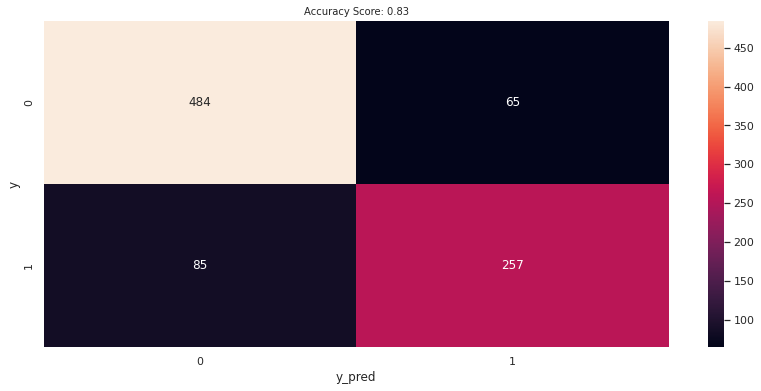

In [68]:
plot_confusion_matrix(y, y_pred)

In [69]:
# Using CV method to validate our model

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [70]:
print(f"""
Accuracy: {cv_results['test_accuracy'].mean()}

Precision: {cv_results['test_precision'].mean()}

Recall: {cv_results['test_recall'].mean()}

F1 Score: {cv_results['test_f1'].mean()}

ROC AUC Score: {cv_results['test_roc_auc'].mean()}
""")


Accuracy: 0.8192831586215554

Precision: 0.7808293582904227

Recall: 0.7395993179880647

F1 Score: 0.7582660094110214

ROC AUC Score: 0.8652057109967315



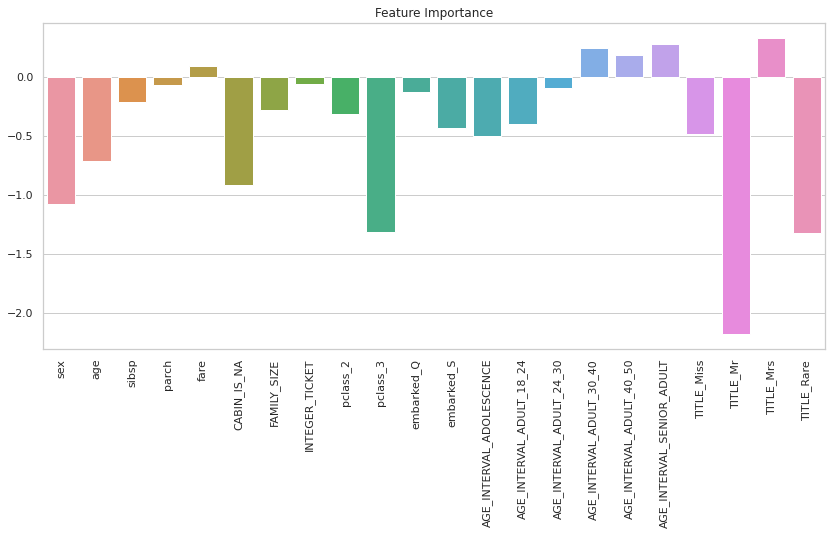

In [71]:
# Feature importance
sns.barplot(x=X.columns, y=log_model.coef_[0])
plt.title('Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

<a id= 'formula'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Formula</h2>

In [72]:
f"{log_model.intercept_[0]} + " + " + ".join(f"{col}*{imp}" for col, imp in zip(X.columns, log_model.coef_[0]))

'-2.2010618700640188 + sex*-1.0737462685183115 + age*-0.7101786207189199 + sibsp*-0.21412228263166594 + parch*-0.0700379420435034 + fare*0.08855151878422446 + CABIN_IS_NA*-0.9190964746206599 + FAMILY_SIZE*-0.2841602246751682 + INTEGER_TICKET*-0.06067449489450668 + pclass_2*-0.3117119038232187 + pclass_3*-1.310876032571676 + embarked_Q*-0.12764141951430305 + embarked_S*-0.42984937468999673 + AGE_INTERVAL_ADOLESCENCE*-0.4991202519970926 + AGE_INTERVAL_ADULT_18_24*-0.4030282388370427 + AGE_INTERVAL_ADULT_24_30*-0.09109547014228561 + AGE_INTERVAL_ADULT_30_40*0.2430657871168493 + AGE_INTERVAL_ADULT_40_50*0.1859946789874695 + AGE_INTERVAL_SENIOR_ADULT*0.2770560152687272 + TITLE_Miss*-0.487691413833275 + TITLE_Mr*-2.1787410850719637 + TITLE_Mrs*0.3290213849444273 + TITLE_Rare*-1.3184900316695607'

<a id= 'conclusion'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Conclusion</h2>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3B9AE1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
         With limited knowledge on machine learning i tried to gain information about the data on the EDA section and predict survival values with logistic regression. With the changings on the feature engineering and model, validation scores can be much better. See you in another version...   
        </p>
    </div>

<a id= 'submission'></a>
<h2 style='font-family:Tahoma; text-align:center;'>Submission</h2>

In [73]:
import os

def create_submission(pred):
    if os.path.exists("/kaggle/working/submission.csv"):
        os.remove("/kaggle/working/submission.csv")
    
    passenger_id = pd.read_csv("/kaggle/input/titanic/test.csv")["PassengerId"]
    survived = pd.Series(pred).rename("Survived")

    output = pd.concat([passenger_id, survived], axis=1)
    output.to_csv("submission.csv", index=False)
    print("Submission was successfully saved!")

In [74]:
test_pred = log_model.predict(df_test)
test_pred = test_pred.astype(int)
create_submission(test_pred)

Submission was successfully saved!


<h2 style='font-family:Tahoma; text-align:center;'>Thanks. 
    Notebook will be updated !</h2>